In [1]:
## Load the librries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
## laod the data set
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## chcek the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

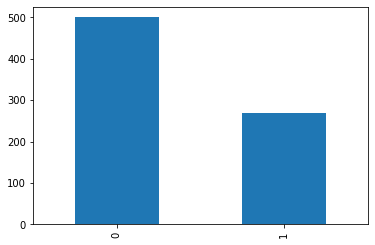

In [14]:
df['Outcome'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

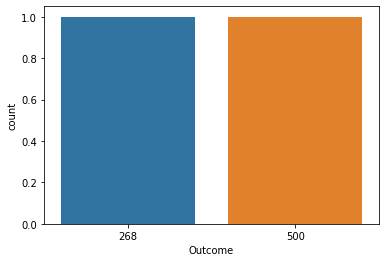

In [13]:
sns.countplot(df['Outcome'].value_counts())

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
minvalzero=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
minvalzero

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [19]:
for i in minvalzero:
    df[i]=df[i].replace(0,df[i].mean())

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
## check the data hav outliers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

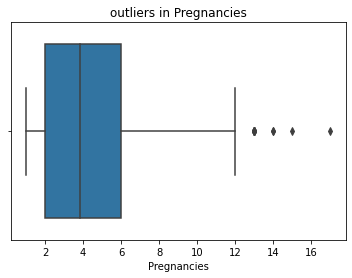

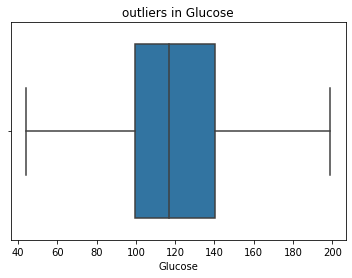

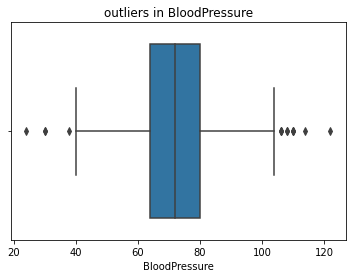

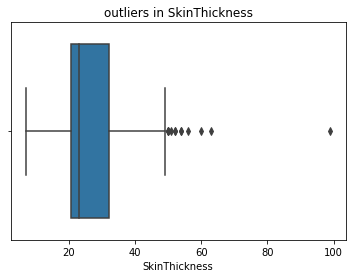

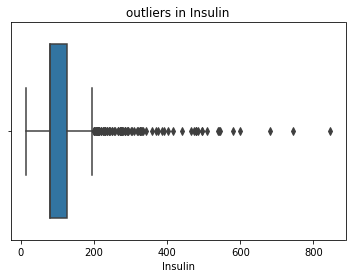

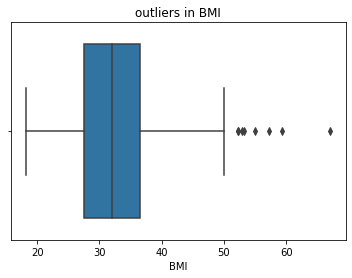

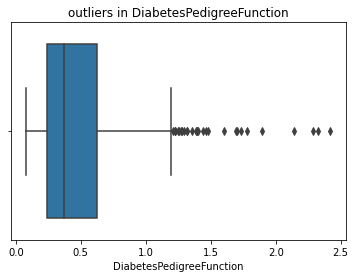

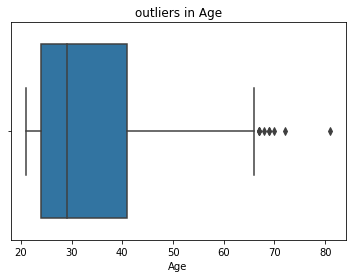

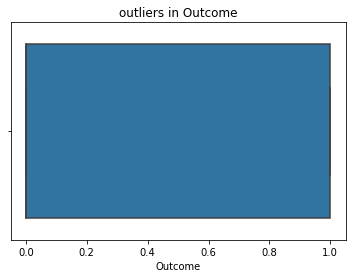

In [25]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title("outliers in " +i)
    plt.show()

In [27]:
### Max outliers are present in 'SkinThickness', 'Insulin'
outliers=['SkinThickness', 'Insulin']
outliers

['SkinThickness', 'Insulin']

In [41]:
for i in outliers:
    mini,q1,middle,q3,maxi=np.quantile(df[i],[0,0.25,0.50,0.75,1])
    IQR=q3-q1
    lower=q1-(IQR*1.5)
    higher=q3+(IQR*1.5)
    print("in "+ i +"in colun have lower values has "+str(lower) + "higher values has" + str(higher))

in SkinThicknessin colun have lower values has 3.341145833333332higher values has49.1953125
in Insulinin colun have lower values has 8.623697916666671higher values has198.42578125


In [42]:
##nFilter outliers
df_copy= df[(df['SkinThickness']<49.19)& (df['Insulin']< 198)]

In [43]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [45]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [46]:
## Independtent and dependtent varibale
X=df_copy.drop('Outcome',axis=1)
y=df_copy['Outcome']

In [47]:
## split the train and test data
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [52]:
## Decision tree classification
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier=DecisionTreeClassifier()

In [54]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_predict=classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [57]:
print('score', accuracy_score(y_test,y_predict))

score 0.6968325791855203


In [58]:
## plot the decision tree
from sklearn import tree

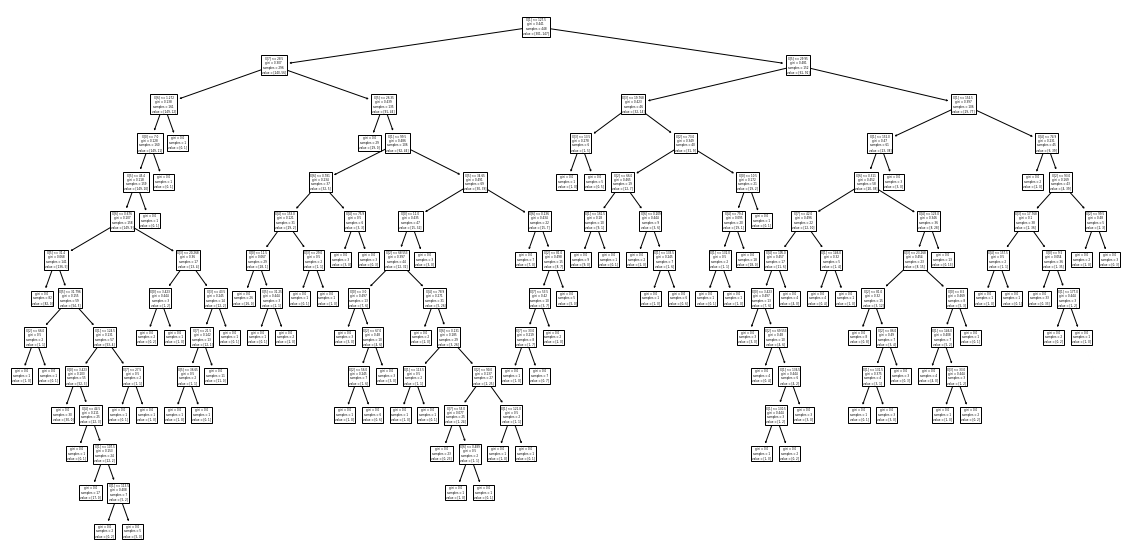

In [59]:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier)
plt.show()

## Grid search cv to check the data

In [70]:
## parameter selection
parameter={
    'criterion' : ("gini", "entropy"),
     'splitter' : ("best", "random"),
     'max_depth': [4,5,6,7,8,9,10],
     'max_features' : ("auto", "sqrt", "log2")
}

In [61]:
from sklearn.model_selection import GridSearchCV

In [71]:
cv=GridSearchCV(classifier,param_grid=parameter,cv=2,scoring='accuracy')

In [72]:
cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [73]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'random'}

In [75]:
classifiercv=DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, splitter='random',max_features='log2')

In [76]:
classifiercv.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       splitter='random')

In [78]:
y_predict=classifier.predict(X_test)

In [79]:
print('score', accuracy_score(y_test,y_predict))

score 0.6968325791855203


Text(33.0, 0.5, 'predict')

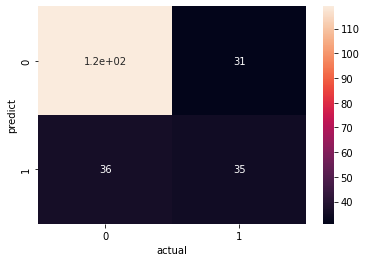

In [81]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.xlabel('actual')
plt.ylabel('predict')

In [82]:
confusion_matrix(y_test,y_predict)

array([[119,  31],
       [ 36,  35]], dtype=int64)